In [31]:
from nbodykit.lab import *
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera
from IPython.display import HTML
import pandas as pd

# Power Spectrum with Varying $n_s$

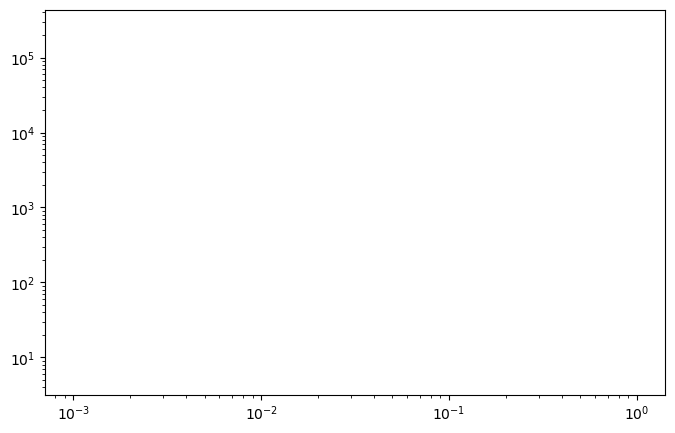

In [7]:
fig,ax = plt.subplots(figsize=(8,5))
camera = Camera(fig)

cosmo = cosmology.Planck15
k = np.logspace(-3, 0, 100)

n_s_vals = np.linspace(0,2,50)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')

    ax.text(.5,2e5,f"$n_s$ : {round(n_s,1)}",fontweight='semibold')
    ax.loglog(k, pSpec(k), c='firebrick')
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

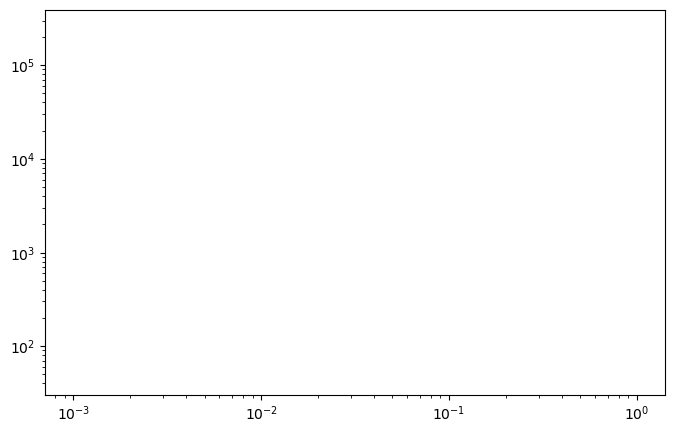

In [62]:
fig,ax = plt.subplots(figsize=(8,5))
camera = Camera(fig)
fig.suptitle("Non-Linear Power Spectrum Evolution for Changing $n_s$")

cosmo = cosmology.Planck15
k = np.logspace(-3, 0, 100)

n_s_vals = np.linspace(0,2,50)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.HalofitPower(cosmo, redshift=0)

    ax.text(.5,2e5,f"$n_s$ : {round(n_s,1)}",fontweight='semibold')
    ax.loglog(k, pSpec(k), c='firebrick')
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

/Users/autumn/opt/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/Users/autumn/opt/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/nbodykit/cosmology/power/zeldovich.py:105: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  self._Q3 = quad(lambda q: (self.Plin(q)/q)**2, 1e-6, 100.)[0]
/Users/autumn/opt/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extr

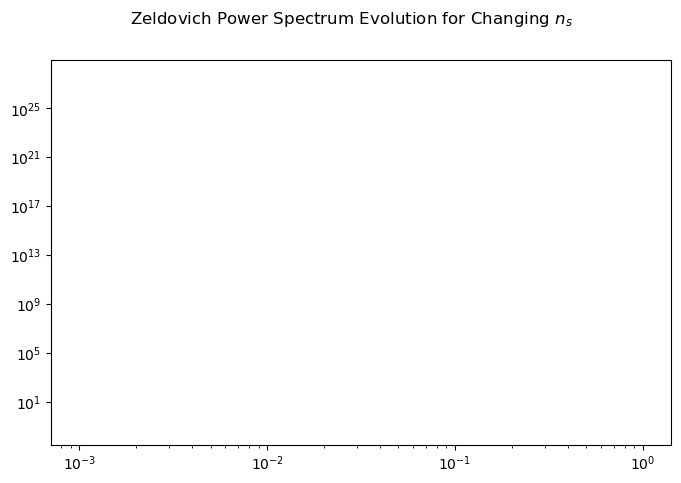

In [63]:
fig,ax = plt.subplots(figsize=(8,5))
camera = Camera(fig)
fig.suptitle("Zeldovich Power Spectrum Evolution for Changing $n_s$")

cosmo = cosmology.Planck15
k = np.logspace(-3, 0, 100)

n_s_vals = np.linspace(0,2,50)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.ZeldovichPower(cosmo, redshift=0)

    ax.text(.5,2e5,f"$n_s$ : {round(n_s,1)}",fontweight='semibold')
    ax.loglog(k, pSpec(k), c='firebrick')
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

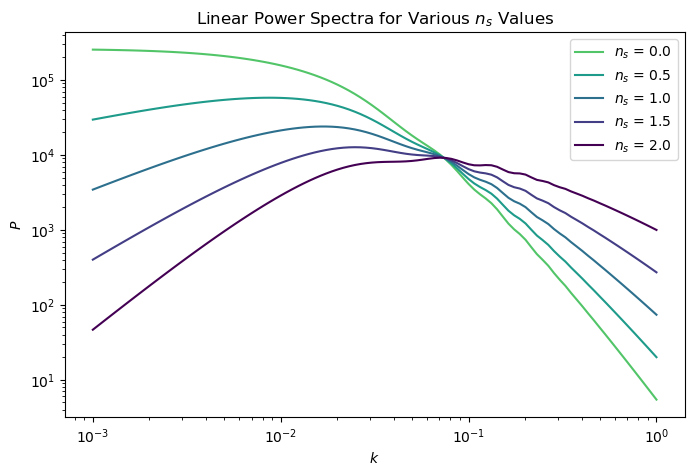

In [53]:
fig,ax = plt.subplots(figsize=(8,5))
cmap = cm.get_cmap('viridis_r', 12)
ax.set_xlabel('$k$')
ax.set_ylabel('$P$')
ax.set_title("Linear Power Spectra for Various $n_s$ Values")

cosmo = cosmology.Planck15
k = np.logspace(-3, 0, 100)

n_s_vals = np.linspace(0,2,5)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')

    col = n_s/3 + .3
    ax.loglog(k, pSpec(k), c = cmap(col), label = f'$n_s$ = {round(n_s,1)}')

plt.legend()
plt.show()

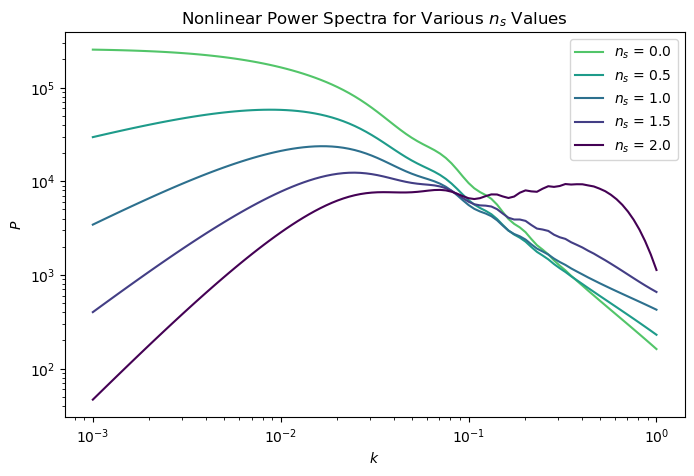

In [55]:
fig,ax = plt.subplots(figsize=(8,5))
cmap = cm.get_cmap('viridis_r', 12)
ax.set_xlabel('$k$')
ax.set_ylabel('$P$')
ax.set_title("Nonlinear Power Spectra for Various $n_s$ Values")

cosmo = cosmology.Planck15
k = np.logspace(-3, 0, 100)

n_s_vals = np.linspace(0,2,5)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.HalofitPower(cosmo, redshift=0)

    col = n_s/3 + .3
    ax.loglog(k, pSpec(k), c = cmap(col), label = f'$n_s$ = {round(n_s,1)}')

plt.legend()
plt.show()

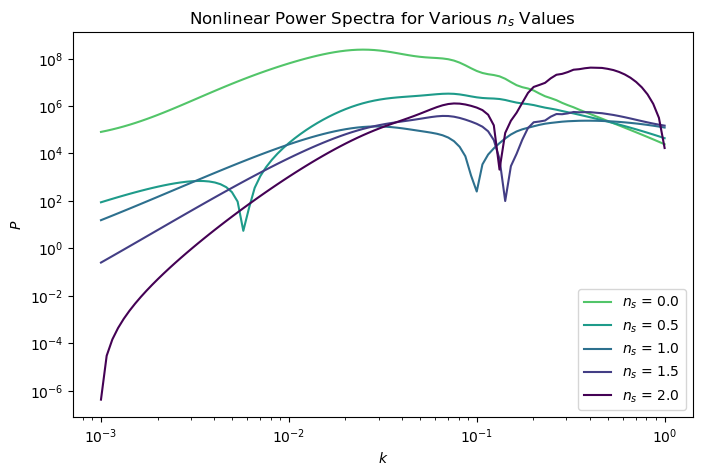

In [56]:
fig,ax = plt.subplots(figsize=(8,5))
cmap = cm.get_cmap('viridis_r', 12)
ax.set_xlabel('$k$')
ax.set_ylabel('Difference')
ax.set_title("Nonlinear Power Spectra for Various $n_s$ Values")

cosmo = cosmology.Planck15
k = np.logspace(-3, 0, 100)

n_s_vals = np.linspace(0,2,5)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    lpSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
    nlpSpec = cosmology.HalofitPower(cosmo, redshift=0)

    col = n_s/3 + .3
    ax.loglog(k, np.square(lpSpec(k)-nlpSpec(k)), c = cmap(col), label = f'$n_s$ = {round(n_s,1)}')

plt.legend()
plt.show()

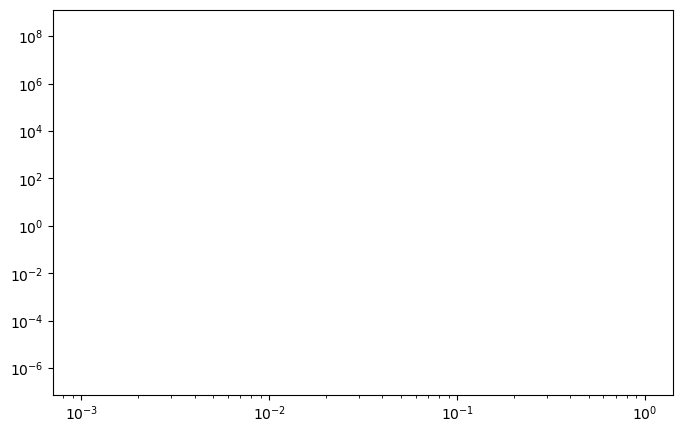

In [57]:
fig,ax = plt.subplots(figsize=(8,5))
camera = Camera(fig)

cosmo = cosmology.Planck15
k = np.logspace(-3, 0, 100)

n_s_vals = np.linspace(0,2,50)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    lpSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
    nlpSpec = cosmology.HalofitPower(cosmo, redshift=0)

    #ax.text(.5,2e5,f"$n_s$ : {round(n_s,1)}",fontweight='semibold')
    ax.loglog(k, np.square(lpSpec(k)-nlpSpec(k)), c='firebrick')
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

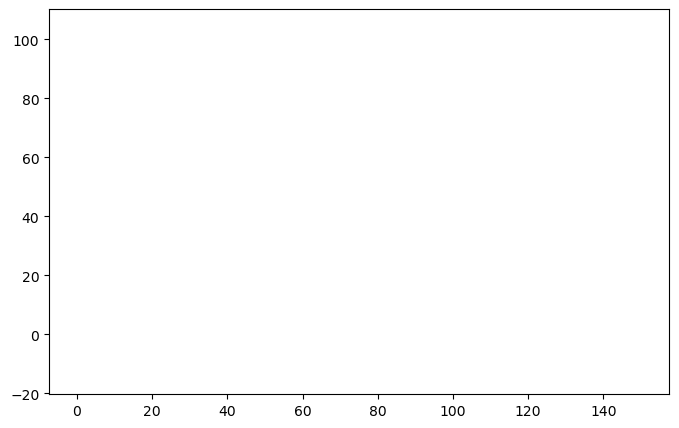

In [6]:
fig,ax = plt.subplots(figsize=(8,5))
camera = Camera(fig)

cosmo = cosmology.Planck15
r = np.logspace(-1, np.log10(150), 1000)

n_s_vals = np.linspace(0,2,50)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
    cFunc = cosmology.CorrelationFunction(pSpec)

    ax.text(0,100,f"$n_s$ : {round(n_s,1)}",fontweight='semibold')
    ax.plot(r, r**2 * cFunc(r), c = 'firebrick')
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

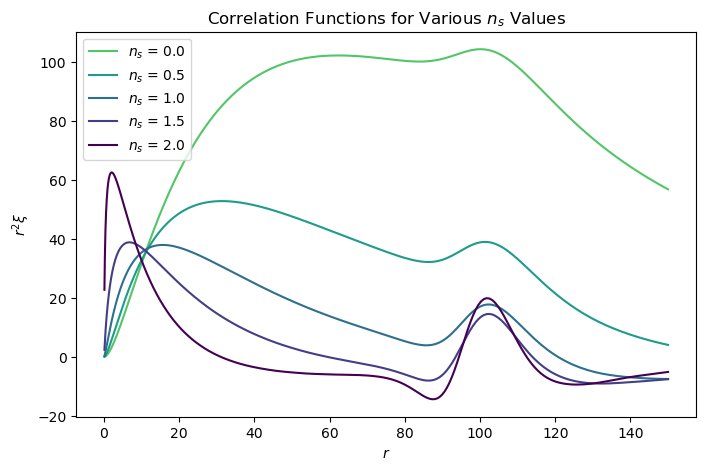

In [54]:
fig,ax = plt.subplots(figsize=(8,5))
cmap = cm.get_cmap('viridis_r', 12)
ax.set_xlabel('$r$')
ax.set_ylabel(r"$r^2 \xi$")
ax.set_title("Correlation Functions for Various $n_s$ Values")

cosmo = cosmology.Planck15
r = np.logspace(-1, np.log10(150), 1000)

n_s_vals = np.linspace(0,2,5)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
    cFunc = cosmology.CorrelationFunction(pSpec)

    col = n_s/3 + .3
    ax.plot(r, r**2 * cFunc(r), c = cmap(col), label = f'$n_s$ = {round(n_s,1)}')

plt.legend()
plt.show()

/Users/autumn/opt/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/nbodykit/source/mesh/linear.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mask = numpy.bitwise_and.reduce([ki == 0 for ki in k])


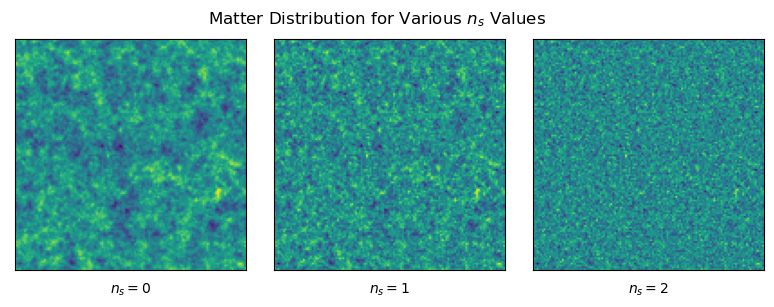

In [58]:
fig,axs = plt.subplots(ncols=3, figsize = (10,3))
fig.suptitle("Matter Distribution for Various $n_s$ Values")
plt.subplots_adjust(wspace=.01, hspace=.01)
cosmo = cosmology.Planck15

cosmo = cosmo.clone(n_s=0)
pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
mesh = LinearMesh(pSpec, Nmesh=128, BoxSize=1380, seed=42)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xlabel("$n_s = 0$")
axs[0].imshow(mesh.preview(axes=[0,1]))

cosmo = cosmo.clone(n_s=1)
pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
mesh = LinearMesh(pSpec, Nmesh=128, BoxSize=1380, seed=42)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_xlabel("$n_s = 1$")
axs[1].imshow(mesh.preview(axes=[0,1]))

cosmo = cosmo.clone(n_s=2)
pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
mesh = LinearMesh(pSpec, Nmesh=128, BoxSize=1380, seed=42)
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[2].set_xlabel("$n_s = 2$")
axs[2].imshow(mesh.preview(axes=[0,1]))

/Users/autumn/opt/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/mcfit/mcfit.py:126: UserWarning: The default value of lowring has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of lowring has been changed to False, "
/Users/autumn/opt/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/nbodykit/cosmology/power/zeldovich.py:105: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  self._Q3 = quad(lambda q: (self.Plin(q)/q)**2, 1e-6, 100.)[0]
/Users/autumn/opt/anaconda3/envs/nbodykit-env/lib/python3.8/site-packages/mcfit/mcfit.py:217: UserWarning: The default value of extrap has been changed to False, set it to True if you cannot reproduce previous results
  warnings.warn("The default value of extr

[]

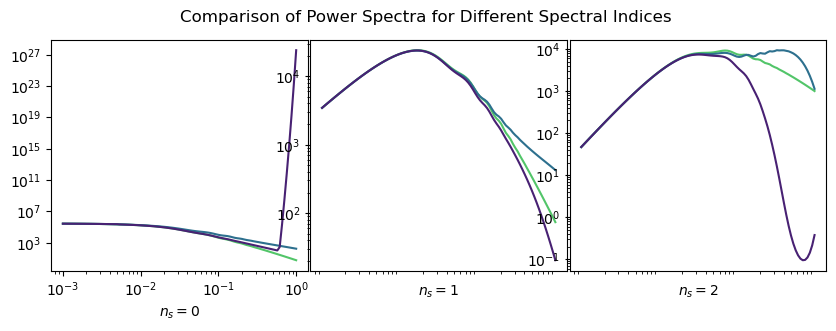

In [61]:
fig,axs = plt.subplots(ncols=3, figsize = (10,3))
fig.suptitle("Comparison of Power Spectra for Different Spectral Indices")
plt.subplots_adjust(wspace=.01, hspace=.01)
cosmo = cosmology.Planck15

n_s_vals = [0,1,2]
for i,n_s in enumerate(n_s_vals):
    cosmo = cosmo.clone(n_s=n_s)
    Plin = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
    Pnl = cosmology.HalofitPower(cosmo, redshift=0)
    Pzel = cosmology.ZeldovichPower(cosmo, redshift=0)

    axs[i].set_xlabel(f"$n_s = {n_s}$")

    axs[i].loglog(k, Plin(k), c = cmap(.3), label = 'Linear')
    axs[i].loglog(k, Pnl(k), c = cmap(.6), label = 'Non-Linear')
    axs[i].loglog(k, Pzel(k), c = cmap(.9), label = 'Zeldovich')

axs[1].set_xticks([])
axs[2].set_xticks([])

    

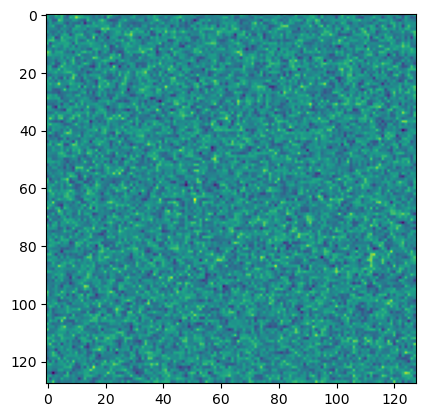

In [19]:
cosmo = cosmology.Planck13
cosmo = cosmo.clone(n_s=2)
pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
mesh = LinearMesh(pSpec, Nmesh=128, BoxSize=1380, seed=42)
plt.imshow(mesh.preview(axes=[0,1]))

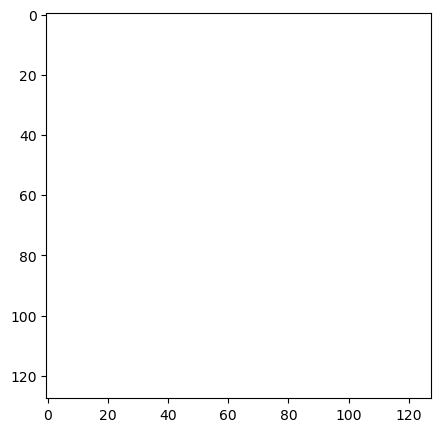

In [20]:
fig,ax = plt.subplots(figsize=(8,5))
camera = Camera(fig)

cosmo = cosmology.Planck15

n_s_vals = np.linspace(0,2,50)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
    mesh = LinearMesh(pSpec, Nmesh=128, BoxSize=1380, seed=42)

    #ax.text(0,100,f"$n_s$ : {round(n_s,1)}",fontweight='semibold')

    plt.imshow(mesh.preview(axes=[0,1]))
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

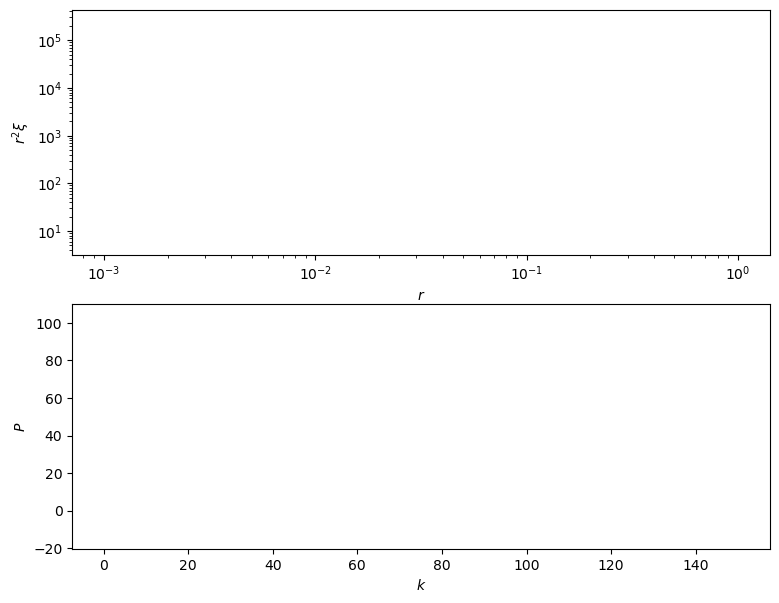

In [24]:
fig,axs = plt.subplots(nrows=2,figsize=(9,7))
axs[1].set_xlabel("$k$")
axs[1].set_ylabel("$P$")

axs[0].set_xlabel("$r$")
axs[0].set_ylabel(r"$r^2 \xi$")

camera = Camera(fig)

cosmo = cosmology.Planck15
r = np.logspace(-1, np.log10(150), 1000)

n_s_vals = np.linspace(0,2,50)
for n_s in n_s_vals:
    cosmo = cosmo.clone(n_s=n_s)
    pSpec = cosmology.LinearPower(cosmo, redshift=0., transfer='CLASS')
    cFunc = cosmology.CorrelationFunction(pSpec)

    axs[0].text(.6,1e5,f"$n_s$ : {round(n_s,1)}",fontweight='semibold')
    axs[0].loglog(k, pSpec(k), c='firebrick')
    axs[1].plot(r, r**2 * cFunc(r), c = 'firebrick')
    camera.snap()

anim = camera.animate(interval = 80)
HTML(anim.to_html5_video())

# quijote

In [27]:
halos0 = pd.read_csv("../hw/hw5/data/halo_z=0.txt", delim_whitespace=True, comment='#')
halos1 = pd.read_csv("../hw/hw5/data/halo_z=1.txt", delim_whitespace=True, comment='#')